### Import and Cleanup

In [60]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pandas import DataFrame

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from functools import reduce

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression 
from yellowbrick.classifier import ConfusionMatrix 
from yellowbrick.classifier import ClassificationReport 
from yellowbrick.classifier import ROCAUC 

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

In [2]:
nba = pd.read_excel('2021-2022 NBA Player Stats.xlsx')
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,60,25,23.2,3.4,7.9,...,0.590,2.1,4.7,6.8,1.1,0.5,0.6,1.2,2.1,8.5
1,2,Steven Adams,C,28,MEM,66,65,26.4,2.9,5.2,...,0.547,4.7,5.2,9.9,3.3,0.8,0.8,1.6,1.9,7.2
2,3,Bam Adebayo,C,24,MIA,45,45,33.0,7.2,13.4,...,0.751,2.4,7.9,10.3,3.5,1.5,0.8,2.8,3.2,19.0
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,...,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,45,12,22.8,5.6,10.1,...,0.873,1.6,4.0,5.6,0.9,0.3,1.0,0.9,1.6,13.5


In [3]:
#Checking number of NaN's per column
columns = nba.columns
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(nba[item].isnull().sum()))

Number of NaN's for  Rk - 0
Number of NaN's for  Player - 0
Number of NaN's for  Pos - 0
Number of NaN's for  Age - 0
Number of NaN's for  Tm - 0
Number of NaN's for  G - 0
Number of NaN's for  GS - 0
Number of NaN's for  MP - 0
Number of NaN's for  FG - 0
Number of NaN's for  FGA - 0
Number of NaN's for  FG% - 0
Number of NaN's for  3P - 0
Number of NaN's for  3PA - 0
Number of NaN's for  3P% - 0
Number of NaN's for  2P - 0
Number of NaN's for  2PA - 0
Number of NaN's for  2P% - 0
Number of NaN's for  eFG% - 0
Number of NaN's for  FT - 0
Number of NaN's for  FTA - 0
Number of NaN's for  FT% - 0
Number of NaN's for  ORB - 0
Number of NaN's for  DRB - 0
Number of NaN's for  TRB - 0
Number of NaN's for  AST - 0
Number of NaN's for  STL - 0
Number of NaN's for  BLK - 0
Number of NaN's for  TOV - 0
Number of NaN's for  PF - 0
Number of NaN's for  PTS - 0


In [4]:
#Checking column data types
nba.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [5]:
#Unique positions values
nba.Pos.value_counts()

SG       191
SF       152
PG       150
PF       146
C        129
SF-SG      6
SG-PG      3
SG-SF      3
C-PF       2
PF-SF      1
PG-SG      1
Name: Pos, dtype: int64

In [6]:
nba.Player.nunique()

597

In [7]:
nba[nba['Tm'] == 'TOT']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,6,Nickeil Alexander-Walker,SG,23,TOT,58,19,23.8,4.2,11.2,...,0.738,0.6,2.4,3.0,2.5,0.7,0.3,1.5,1.6,11.4
11,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,...,0.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5
22,19,D.J. Augustin,PG,34,TOT,42,2,15.1,1.6,4.0,...,0.872,0.2,1.0,1.3,2.1,0.3,0.0,1.1,0.5,5.2
29,24,Marvin Bagley III,PF,22,TOT,40,20,23.2,4.5,9.1,...,0.652,2.3,4.9,7.2,0.7,0.4,0.4,0.8,1.9,10.5
51,44,DeAndre' Bembry,SF,27,TOT,56,20,18.3,2.2,3.9,...,0.600,0.8,2.2,2.9,1.2,0.9,0.4,0.6,2.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,560,Brad Wanamaker,PG,32,TOT,23,2,13.9,1.2,3.3,...,0.920,0.3,1.4,1.7,2.4,0.3,0.3,1.0,2.0,3.6
743,565,Tremont Waters,PG,24,TOT,3,0,16.7,1.3,4.7,...,0.000,0.0,1.3,1.3,2.3,1.7,0.0,1.3,1.3,3.3
751,571,Derrick White,SG,27,TOT,63,49,29.2,4.6,11.1,...,0.860,0.5,3.0,3.5,5.0,1.0,0.9,1.6,2.3,13.4
768,586,Justise Winslow,SF,25,TOT,45,8,15.7,2.2,5.0,...,0.614,1.0,3.2,4.1,1.7,0.7,0.5,1.0,1.4,5.5


##### The hyphenated Positions are a combination of one players' total stats across multiple positions vs stats per position, so these will be removed. We are not analysing the players, but the positions. 

##### The opposite is true for the lines where Tm = TOT but the Position is not hyphenated. This means the player stayed in the same position across teams. The individual lines will be removed and only the TOT line will stay, so the numbers are not duplicated in the calculations

In [8]:
nba[nba['Pos'].str.contains("-")]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
81,70,Armoni Brooks,SG-PG,23,TOT,46,9,15.9,1.9,5.7,...,0.842,0.3,1.5,1.9,1.1,0.5,0.2,0.5,1.3,5.6
89,74,Chaundee Brown Jr.,SG-SF,23,TOT,5,2,20.8,2.0,6.4,...,0.833,0.2,3.0,3.2,0.8,0.4,0.0,0.2,1.4,6.2
145,118,Robert Covington,PF-SF,31,TOT,61,40,27.9,2.7,6.8,...,0.830,0.9,4.7,5.6,1.3,1.5,1.3,1.1,2.7,7.7
272,211,Tyrese Haliburton,SG-PG,21,TOT,65,65,35.1,5.5,11.9,...,0.833,0.7,3.3,4.0,7.9,1.8,0.6,2.6,1.5,15.2
278,215,James Harden,PG-SG,32,TOT,53,53,37.1,6.5,15.6,...,0.872,0.9,6.9,7.8,10.2,1.3,0.6,4.5,2.4,22.5
290,223,Josh Hart,SG-SF,26,TOT,52,51,33.1,5.1,10.3,...,0.756,1.2,6.1,7.3,4.1,1.1,0.3,2.1,2.8,14.5
311,237,Malcolm Hill,SF-SG,26,TOT,17,0,11.6,1.4,2.9,...,0.786,0.6,1.2,1.9,0.3,0.4,0.2,0.1,1.3,4.1
321,243,Justin Holiday,SF-SG,32,TOT,63,54,28.5,3.7,9.2,...,0.846,0.4,2.3,2.7,1.8,0.7,0.4,1.0,2.1,10.5
325,245,Rodney Hood,SF-SG,29,TOT,46,0,13.8,1.1,3.1,...,0.929,0.3,1.2,1.5,0.7,0.3,0.1,0.2,0.6,3.1
339,254,Elijah Hughes,SF-SG,23,TOT,25,3,10.3,1.1,3.4,...,0.800,0.2,1.4,1.6,0.5,0.3,0.2,0.5,1.0,3.0


In [9]:
new = nba[~nba['Pos'].str.contains("-")].reset_index(drop = True)
new.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,60,25,23.2,3.4,7.9,...,0.590,2.1,4.7,6.8,1.1,0.5,0.6,1.2,2.1,8.5
1,2,Steven Adams,C,28,MEM,66,65,26.4,2.9,5.2,...,0.547,4.7,5.2,9.9,3.3,0.8,0.8,1.6,1.9,7.2
2,3,Bam Adebayo,C,24,MIA,45,45,33.0,7.2,13.4,...,0.751,2.4,7.9,10.3,3.5,1.5,0.8,2.8,3.2,19.0
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,...,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,45,12,22.8,5.6,10.1,...,0.873,1.6,4.0,5.6,0.9,0.3,1.0,0.9,1.6,13.5


In [10]:
#Dropping duplicated rows, keeping the 'TOT' lines which come first AND players who appear twice due to playing in two positions
new = new.drop_duplicates(subset=['Player', 'Pos'], keep='first')
new = new.reset_index(drop = True)

In [11]:
#Didn't lose any players
new.Player.nunique()

597

In [12]:
#Kept all TOTs needed - only the 12 hyphenated Positions were removed
new[new['Tm'] == 'TOT']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,6,Nickeil Alexander-Walker,SG,23,TOT,58,19,23.8,4.2,11.2,...,0.738,0.6,2.4,3.0,2.5,0.7,0.3,1.5,1.6,11.4
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,...,0.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5
18,19,D.J. Augustin,PG,34,TOT,42,2,15.1,1.6,4.0,...,0.872,0.2,1.0,1.3,2.1,0.3,0.0,1.1,0.5,5.2
23,24,Marvin Bagley III,PF,22,TOT,40,20,23.2,4.5,9.1,...,0.652,2.3,4.9,7.2,0.7,0.4,0.4,0.8,1.9,10.5
43,44,DeAndre' Bembry,SF,27,TOT,56,20,18.3,2.2,3.9,...,0.600,0.8,2.2,2.9,1.2,0.9,0.4,0.6,2.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,560,Brad Wanamaker,PG,32,TOT,23,2,13.9,1.2,3.3,...,0.920,0.3,1.4,1.7,2.4,0.3,0.3,1.0,2.0,3.6
580,565,Tremont Waters,PG,24,TOT,3,0,16.7,1.3,4.7,...,0.000,0.0,1.3,1.3,2.3,1.7,0.0,1.3,1.3,3.3
586,571,Derrick White,SG,27,TOT,63,49,29.2,4.6,11.1,...,0.860,0.5,3.0,3.5,5.0,1.0,0.9,1.6,2.3,13.4
601,586,Justise Winslow,SF,25,TOT,45,8,15.7,2.2,5.0,...,0.614,1.0,3.2,4.1,1.7,0.7,0.5,1.0,1.4,5.5


### Summary Statistics

In [13]:
new.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,298.371941,25.805873,36.166395,17.014682,18.599347,2.966558,6.584666,0.428434,0.895759,2.629038,...,0.658163,0.811746,2.598695,3.410440,1.835563,0.589723,0.365579,1.004078,1.585481,8.061338
std,171.685166,4.138118,22.306064,22.229451,9.956093,2.320097,4.877706,0.148437,0.860830,2.279119,...,0.277048,0.736286,1.866500,2.426371,1.883105,0.429099,0.380195,0.857931,0.831941,6.432162
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.000000,23.000000,13.000000,0.000000,10.500000,1.200000,3.000000,0.389000,0.200000,0.800000,...,0.609000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,296.000000,25.000000,41.000000,5.000000,17.900000,2.500000,5.300000,0.440000,0.700000,2.100000,...,0.750000,0.600000,2.300000,3.000000,1.200000,0.500000,0.300000,0.800000,1.600000,6.500000
75%,448.000000,28.000000,57.000000,29.000000,27.000000,4.100000,9.100000,0.492000,1.400000,4.100000,...,0.833000,1.100000,3.400000,4.600000,2.400000,0.800000,0.500000,1.300000,2.200000,11.000000
max,597.000000,41.000000,71.000000,70.000000,38.100000,11.100000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.700000,11.200000,14.800000,10.700000,2.300000,2.800000,4.800000,4.500000,29.900000


In [14]:
new.describe(include=['object'])

,Player,Pos,Tm
count,613,613,613
unique,597,5,31
top,Justin Holiday,SG,TOT
freq,2,156,72


In [15]:
new.groupby('Pos').mean()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,288.252427,26.631068,39.563107,21.242718,17.766990,3.099029,5.728155,0.513311,0.360194,1.066019,...,0.649126,1.692233,3.753398,5.446602,1.234951,0.506796,0.719417,0.993204,1.945631,7.948544
PF,293.241071,25.919643,38.705357,18.160714,19.058929,3.034821,6.404464,0.459295,0.806250,2.315179,...,0.676455,1.058036,3.151786,4.211607,1.407143,0.562500,0.486607,0.922321,1.745536,8.206250
PG,312.396552,26.025862,35.137931,18.517241,20.343966,3.336207,7.894828,0.409250,1.121552,3.293103,...,0.682991,0.427586,2.217241,2.648276,3.481034,0.741379,0.231034,1.463793,1.555172,9.243103
SF,282.261905,25.404762,34.880952,15.365079,18.013492,2.750000,6.317460,0.400556,0.942857,2.823016,...,0.657429,0.679365,2.348413,3.031746,1.368254,0.554762,0.281746,0.828571,1.475397,7.532540
SG,311.320513,25.339744,33.903846,13.615385,17.994872,2.730128,6.521154,0.387019,1.107692,3.235897,...,0.633128,0.446154,1.925000,2.363462,1.693590,0.579487,0.212821,0.869872,1.344231,7.580128


In [16]:
new.groupby('Pos').max()

,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,597,Willy Hernangómez,41,WAS,70,70,35.1,9.9,19.3,0.771,...,1.0,4.7,11.2,14.8,8.1,1.5,2.8,3.7,3.7,29.9
PF,593,Zeke Nnaji,37,WAS,69,69,37.6,10.5,20.2,0.733,...,1.0,3.0,9.5,11.8,7.2,1.5,2.2,3.5,3.8,29.8
PG,594,Tyus Jones,36,WAS,69,68,38.1,10.2,21.8,1.000,...,1.0,1.5,8.4,9.3,10.7,2.3,1.3,4.8,4.5,28.2
SF,589,Zylan Cheatham,38,WAS,71,70,36.9,11.1,21.4,0.667,...,1.0,2.0,7.1,8.3,6.2,2.0,1.2,4.2,3.7,29.5
SG,590,Xavier Moon,40,WAS,70,67,37.6,9.5,20.7,1.000,...,1.0,2.8,6.5,7.8,10.6,1.9,1.1,3.4,2.9,25.8


In [17]:
group_pos = new.groupby('Pos').mean()
group_pos[group_pos.TOV == group_pos.TOV.max()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
PG,312.396552,26.025862,35.137931,18.517241,20.343966,3.336207,7.894828,0.40925,1.121552,3.293103,...,0.682991,0.427586,2.217241,2.648276,3.481034,0.741379,0.231034,1.463793,1.555172,9.243103


In [18]:
group_pos[group_pos.TOV == group_pos.TOV.min()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
SF,282.261905,25.404762,34.880952,15.365079,18.013492,2.75,6.31746,0.400556,0.942857,2.823016,...,0.657429,0.679365,2.348413,3.031746,1.368254,0.554762,0.281746,0.828571,1.475397,7.53254


In [19]:
group_pos[group_pos['3P'] == group_pos['3P'].max()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
PG,312.396552,26.025862,35.137931,18.517241,20.343966,3.336207,7.894828,0.40925,1.121552,3.293103,...,0.682991,0.427586,2.217241,2.648276,3.481034,0.741379,0.231034,1.463793,1.555172,9.243103


In [20]:
group_pos[group_pos['3P'] == group_pos['3P'].min()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,288.252427,26.631068,39.563107,21.242718,17.76699,3.099029,5.728155,0.513311,0.360194,1.066019,...,0.649126,1.692233,3.753398,5.446602,1.234951,0.506796,0.719417,0.993204,1.945631,7.948544


In [21]:
group_pos[group_pos['3P%'] == group_pos['3P%'].max()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
PF,293.241071,25.919643,38.705357,18.160714,19.058929,3.034821,6.404464,0.459295,0.80625,2.315179,...,0.676455,1.058036,3.151786,4.211607,1.407143,0.5625,0.486607,0.922321,1.745536,8.20625


In [22]:
group_pos['3P%'].max()

0.30328571428571427

In [23]:
group_pos[group_pos['3P%'] == group_pos['3P%'].min()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,288.252427,26.631068,39.563107,21.242718,17.76699,3.099029,5.728155,0.513311,0.360194,1.066019,...,0.649126,1.692233,3.753398,5.446602,1.234951,0.506796,0.719417,0.993204,1.945631,7.948544


In [24]:
group_pos['3P%'].min()

0.21778640776699026

In [25]:
group_play = new.groupby('Player').sum()
group_play[group_play.MP == group_play.MP.max()]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,430,64,53,53,74.6,12.5,29.7,0.845,4.6,13.3,...,1.755,1.4,13.3,14.8,20.8,2.7,0.8,8.0,5.1,45.3


In [26]:
new[new.Player == 'James Harden']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
218,215,James Harden,PG,32,BRK,44,44,37.0,6.6,16.0,...,0.869,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5
219,215,James Harden,SG,32,PHI,9,9,37.6,5.9,13.7,...,0.886,0.4,6.3,6.8,10.6,1.4,0.1,3.2,2.7,22.8


### Visualizations

<AxesSubplot:>

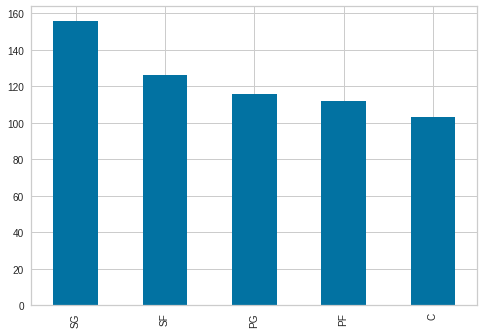

In [27]:
#Histogram of positions
new['Pos'].value_counts().plot(kind='bar')

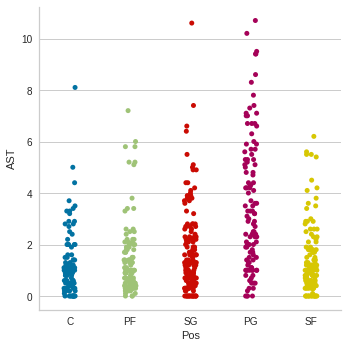

In [28]:
#Distribution of points per game by position
sns.catplot(x="Pos", y="AST", data=new)

In [29]:
print(new[new['Pos'] == 'C'].AST.mean())
print(new[new['Pos'] == 'PF'].AST.mean())
print(new[new['Pos'] == 'SG'].AST.mean())
print(new[new['Pos'] == 'PG'].AST.mean())
print(new[new['Pos'] == 'SF'].AST.mean())


1.2349514563106798
1.4071428571428573
1.6935897435897436
3.481034482758621
1.3682539682539683


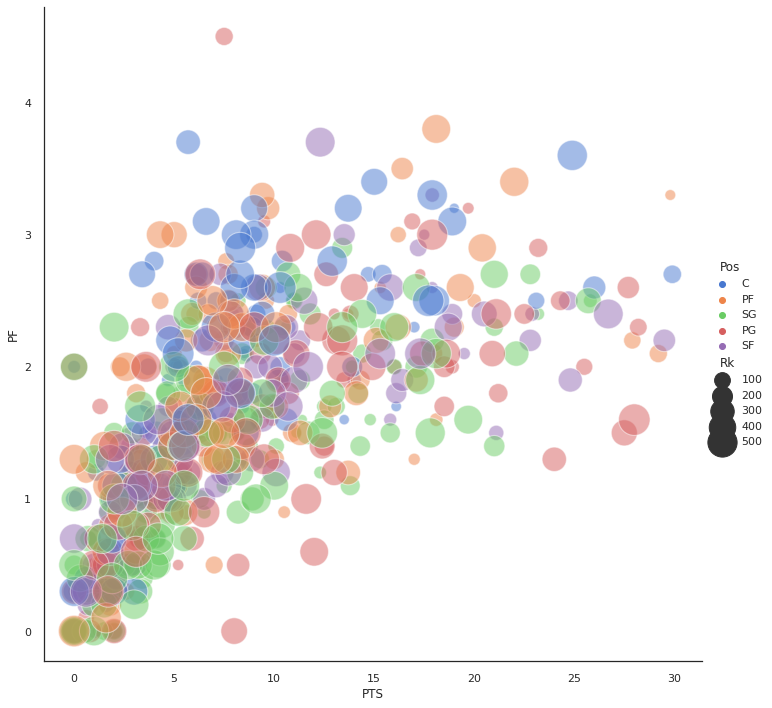

In [30]:
#Bubble plot Points per Game vs Personal Fouls, sized by rank and colored by position
sns.set_theme(style="white")

sns.relplot(x="PTS", y="PF", hue="Pos", size="Rk",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=10, data=new)

### Feature Selection

In [31]:
#Create dummy variables
dummies = pd.get_dummies(new['Pos'])
dummies.head()

,C,PF,PG,SF,SG
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [32]:
#Concatenate dummy variables and remove categorical features
newconcat = pd.concat([new, dummies], axis=1)
del newconcat['Pos']
del newconcat['Tm']
del newconcat['Player']

newconcat.head()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,STL,BLK,TOV,PF,PTS,C,PF,PG,SF,SG
0,1,22,60,25,23.2,3.4,7.9,0.434,0.6,1.6,...,0.5,0.6,1.2,2.1,8.5,1,0,0,0,0
1,2,28,66,65,26.4,2.9,5.2,0.557,0.0,0.0,...,0.8,0.8,1.6,1.9,7.2,1,0,0,0,0
2,3,24,45,45,33.0,7.2,13.4,0.541,0.0,0.1,...,1.5,0.8,2.8,3.2,19.0,1,0,0,0,0
3,4,21,27,0,10.3,1.4,3.6,0.381,0.1,1.4,...,0.1,0.3,0.3,1.0,3.3,0,1,0,0,0
4,5,36,45,12,22.8,5.6,10.1,0.554,0.3,1.0,...,0.3,1.0,0.9,1.6,13.5,1,0,0,0,0


In [33]:
x = newconcat.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.         -0.07347728 -0.05235418 ...  0.03949693 -0.04776822
   0.04410094]
 [-0.07347728  1.          0.08392175 ...  0.0257042  -0.04934429
  -0.06586613]
 [-0.05235418  0.08392175  1.         ... -0.02229315 -0.02933628
  -0.05931079]
 ...
 [ 0.03949693  0.0257042  -0.02229315 ...  1.         -0.24573759
  -0.28226368]
 [-0.04776822 -0.04934429 -0.02933628 ... -0.24573759  1.
  -0.2971837 ]
 [ 0.04410094 -0.06586613 -0.05931079 ... -0.28226368 -0.2971837
   1.        ]]


Text(0.5, 1.0, 'Correlation between all features using dummy features for Positions')

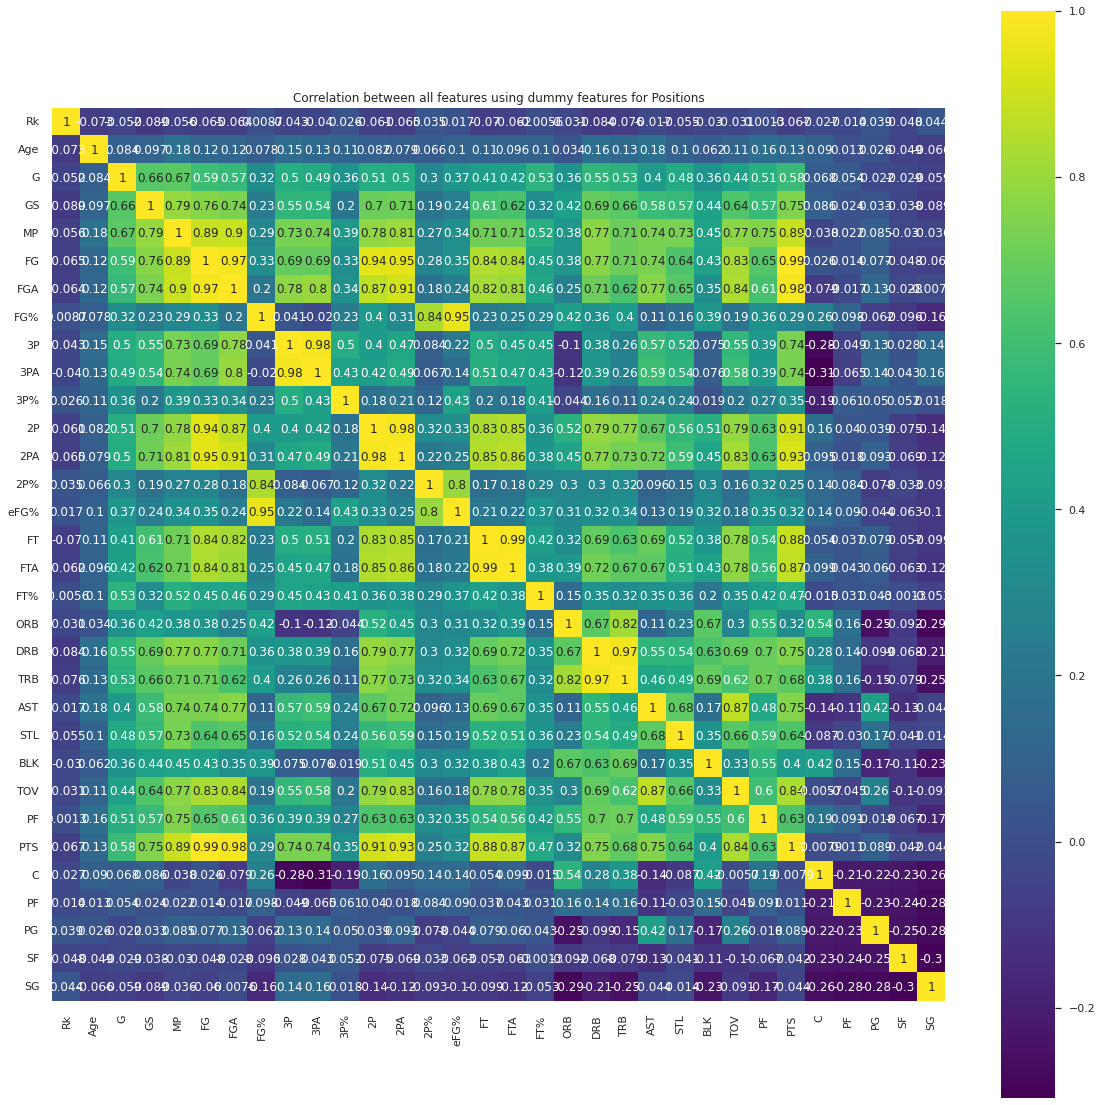

In [34]:
correlation = newconcat.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between all features using dummy features for Positions')

In [35]:
features = new[new.columns.difference(["Pos"])]
labels = new["Pos"]

In [36]:
#Random Forest Classifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

accuracy = accuracy_score(preds,labels)
print(accuracy)

0.9967373572593801


In [37]:
RFimp = DataFrame(clf.feature_importances_, columns = ["RFimp"], index=features.columns)
RFimp = RFimp.reset_index()

In [38]:
RFimp.sort_values(['RFimp'],ascending=0)

,index,RFimp
6,AST,0.083829
18,ORB,0.081690
23,TRB,0.056874
10,FG%,0.054676
5,3PA,0.047445
7,BLK,0.045443
1,2P%,0.045050
8,DRB,0.043267
17,MP,0.042384
24,eFG%,0.039746


In [39]:
#Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.03051892 0.03706423 0.03094788 0.0403319  0.03219659 0.04806417
 0.07758131 0.04674483 0.04570247 0.0280941  0.04629302 0.0321689
 0.02967636 0.03032652 0.02951875 0.03375761 0.02647455 0.04114362
 0.07417135 0.03445519 0.0267503  0.03829335 0.04160542 0.06420548
 0.03391319]


In [40]:
EXimp = DataFrame(model.feature_importances_, columns = ["EXimp"], index=features.columns)

In [41]:
EXimp = EXimp.reset_index()

In [42]:
EXimp.sort_values(['EXimp'],ascending=0)

,index,EXimp
6,AST,0.077581
18,ORB,0.074171
23,TRB,0.064205
5,3PA,0.048064
7,BLK,0.046745
10,FG%,0.046293
8,DRB,0.045702
22,TOV,0.041605
17,MP,0.041144
3,3P,0.040332


In [43]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [44]:
SVCimp = DataFrame(model.get_support(), columns = ["SVCimp"], index=features.columns)

In [45]:
SVCimp = SVCimp.reset_index()

In [46]:
SVCimp[SVCimp['SVCimp'] == True]

,index,SVCimp
5,3PA,True
6,AST,True
15,G,True
16,GS,True
17,MP,True
20,PTS,True
23,TRB,True


In [47]:
initial = ['3PA', 'AST', 'G', 'GS', 'MP', 'PTS', 'TRB', 'ORB', 'DRB', 'FG%']

In [48]:
#Double checking initial choices

dfs = [RFimp, EXimp, SVCimp]
results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
results.head(10)

,index,RFimp,EXimp,SVCimp
0,2P,0.026020,0.030519,False
1,2P%,0.045050,0.037064,False
2,2PA,0.034697,0.030948,False
3,3P,0.037919,0.040332,False
4,3P%,0.030782,0.032197,False
5,3PA,0.047445,0.048064,True
6,AST,0.083829,0.077581,True
7,BLK,0.045443,0.046745,False
8,DRB,0.043267,0.045702,False
9,FG,0.025090,0.028094,False


In [49]:
results.columns

Index(['index', 'RFimp', 'EXimp', 'SVCimp'], dtype='object')

In [50]:
columns = ['RFimp', 'EXimp']

scores = pd.DataFrame({},[])
scores['index'] = results['index']

for i in columns:
    scores[i] = results['index'].isin(list(results.nlargest(5,i)['index'])).astype(int)
    
scores['SVCimp'] = results['SVCimp'].astype(int)

In [51]:
scores['score'] = scores.sum(axis=1)
selected = scores.sort_values('score',ascending=0).head(10)
selected

/home/kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,index,RFimp,EXimp,SVCimp,score
23,TRB,1,1,1,3
5,3PA,1,1,1,3
6,AST,1,1,1,3
18,ORB,1,1,0,2
15,G,0,0,1,1
7,BLK,0,1,0,1
20,PTS,0,0,1,1
10,FG%,1,0,0,1
17,MP,0,0,1,1
16,GS,0,0,1,1


In [52]:
#My initial choices matched 9 out of the top ten scored features - glad I double checked!
chosen = selected['index'].tolist()
chosen

['TRB', '3PA', 'AST', 'ORB', 'G', 'BLK', 'PTS', 'FG%', 'MP', 'GS']

# Modeling

### Logistic Regression

In [53]:
data_model_X = new[chosen]
data_model_y = labels

In [54]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=30) 

print("No. of samples in training set: ", X_train.shape[0]) 
print('\n') 
print('Number of ratings in the training set:') 
print(y_train.value_counts()) 

print('\n') 

print("No. of samples in validation set:", X_val.shape[0]) 
print('\n') 
print('Number of ratings in the validation set:') 
print(y_val.value_counts())

No. of samples in training set:  429


Number of ratings in the training set:
SG    112
SF     84
PG     81
PF     77
C      75
Name: Pos, dtype: int64


No. of samples in validation set: 184


Number of ratings in the validation set:
SG    44
SF    42
PF    35
PG    35
C     28
Name: Pos, dtype: int64


In [55]:
model = LogisticRegression() 

/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.45108695652173914

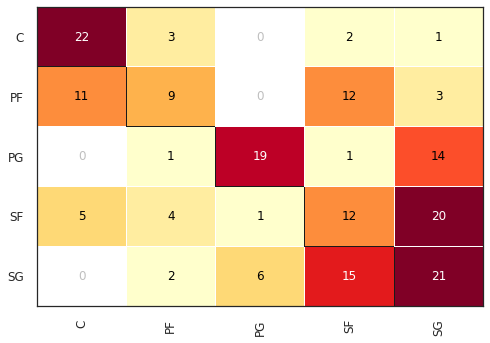

In [56]:
classes = ['C','PF','PG','SF','SG'] 

cm = ConfusionMatrix(model, classes=classes, percent=False) 
cm = cm.fit(X_train, y_train)
cm.score(X_val, y_val) 

##### Logistic Regression has a total accuracy of 45.1%, but we can see it was very strong in predicting Centers and Point Guards with 22 and 19 True Positives, respectively. The Shooting Guards proved to be difficult to distinguish between Small Forwards, though.

/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.45108695652173914

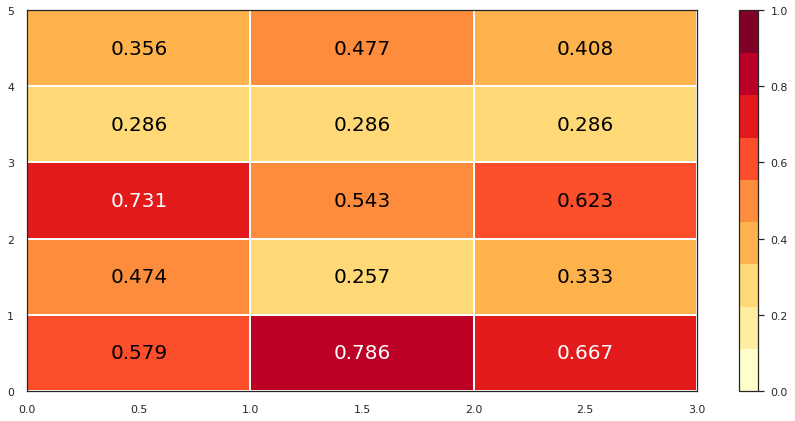

In [57]:
%matplotlib inline 

plt.rcParams['figure.figsize'] = (15, 7) 
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(model, classes=classes) 
visualizer = visualizer.fit(X_train, y_train)  
visualizer.score(X_val, y_val) 

/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8043067409819702

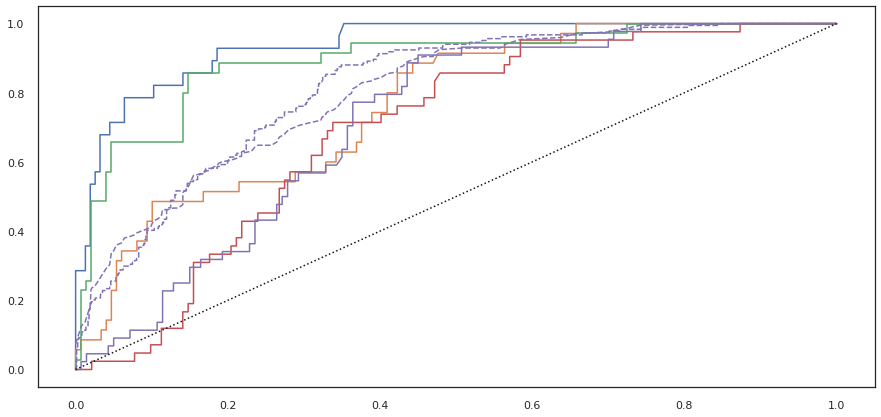

In [58]:
model = LogisticRegression() 
visualizer = ROCAUC(model)

visualizer = visualizer.fit(X_train, y_train) 
visualizer.score(X_val, y_val) 

##### With an ROC AUC result of .8043, the Logistic Regression model did okay. I'd like it to be higher, but .8043 will work.

### Decision Tree

In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred = dt.predict(X_val)

In [63]:
print (confusion_matrix(y_val, y_pred))

print (accuracy_score(y_val, y_pred))

print(classification_report(y_val, y_pred))

[[17  6  1  2  2]
 [ 6 10  1 10  8]
 [ 2  1 21  5  6]
 [ 7  5  4 11 15]
 [ 0  7  6 12 19]]
0.42391304347826086
              precision    recall  f1-score   support

           C       0.53      0.61      0.57        28
          PF       0.34      0.29      0.31        35
          PG       0.64      0.60      0.62        35
          SF       0.28      0.26      0.27        42
          SG       0.38      0.43      0.40        44

    accuracy                           0.42       184
   macro avg       0.43      0.44      0.43       184
weighted avg       0.42      0.42      0.42       184



##### The Decision Trees Classifier only did okay with Centers and Point Guards and badly with the others. 

##### Let's see if the Gini and Entropy indexes will help increase accuracy

In [64]:
def gini_train(X_train, X_val, y_train):
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", 
        random_state = 30, 
        max_depth = 3)
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

def entropy_train(X_train, X_val, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", 
        random_state = 30, 
        max_depth = 3)
    
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def predicting(X_val, clf_object):
    y_pred = clf_object.predict(X_val)
    print ("Predicted Values")
    print(y_pred)
    return y_pred

def calc_accuracy(y_val, y_pred):
    print ("Confusion Matrix: ", 
          confusion_matrix(y_val, y_pred))
    print ("Accuracy: ", 
          accuracy_score(y_val, y_pred)*100)
    print ("Report: ", 
          classification_report(y_val, y_pred))
    

def main():
    clf_gini = gini_train(X_train, X_val, y_train)
    clf_entropy = entropy_train(X_train, X_val, y_train)
    
    print ("Results using the Gini Index: ")
    
    y_pred_gini = predicting(X_val, clf_gini)
    calc_accuracy(y_val, y_pred_gini)
    
    print ("Results using Entropy: ")
    
    y_pred_entropy = predicting(X_val, clf_entropy)
    calc_accuracy(y_val, y_pred_entropy)

In [65]:
if __name__ == "__main__":
    main()

Results using the Gini Index: 
Predicted Values
['C' 'SG' 'PF' 'PF' 'C' 'SG' 'SG' 'SG' 'PG' 'PG' 'SG' 'SG' 'SG' 'SG' 'SG'
 'SG' 'PF' 'SG' 'PG' 'PF' 'SG' 'PF' 'PF' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG'
 'PF' 'PF' 'PF' 'SG' 'C' 'SG' 'SG' 'PF' 'PF' 'PF' 'PG' 'SG' 'SG' 'SG' 'PG'
 'SG' 'PF' 'PF' 'SG' 'SG' 'SG' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'PF' 'SG' 'SG'
 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'C' 'SG' 'C' 'SG' 'C' 'SG'
 'PF' 'C' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'C' 'SG' 'PF' 'SG' 'SG' 'C' 'PF'
 'C' 'PF' 'PF' 'SG' 'SG' 'SG' 'PG' 'SG' 'SG' 'SG' 'SG' 'PF' 'SG' 'C' 'SG'
 'C' 'SG' 'C' 'SG' 'PF' 'SG' 'SG' 'SG' 'PF' 'PF' 'SG' 'PG' 'SG' 'C' 'SG'
 'PF' 'SG' 'SG' 'C' 'PF' 'PF' 'SG' 'PF' 'SG' 'SG' 'SG' 'C' 'SG' 'PF' 'SG'
 'PF' 'SG' 'PF' 'PG' 'SG' 'PF' 'SG' 'SG' 'SG' 'SG' 'PF' 'PF' 'SG' 'PG'
 'PF' 'PF' 'PF' 'SG' 'PG' 'C' 'SG' 'SG' 'SG' 'SG' 'SG' 'PG' 'C' 'C' 'SG'
 'PF' 'SG' 'SG' 'PF' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'PF' 'SG' 'SG' 'PF'
 'PF' 'PF' 'SG' 'PF' 'SG' 'C' 'SG']
Confusion Matrix:  [[15  7  0  0  6]
 [

/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kim/anaconda3/lib/python3.7/site-p

##### Both Gini and Entropy indexes have poor overall accuracy, but the precision for Centers and Point Guards went up even more. 

##### Let's tune the parameters and see if we can get better overall accuracy

In [66]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5),
    "random_state": range(10,20)
}

In [67]:
grid = GridSearchCV(dt,
                    param_grid = param_dict,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 6480 candidates, totalling 64800 fits


/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7200 fits failed out of a total of 64800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/home/kim/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split mus

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10),
                         'random_state': range(10, 20)},
             verbose=1)

In [68]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'random_state': 14}

In [69]:
def gini_train_update(X_train, X_val, y_train):
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", 
        max_depth = 8,
        min_samples_leaf = 4,
        min_samples_split = 9,
        random_state = 14,
)
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

def entropy_train_update(X_train, X_val, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", 
        max_depth = 8,
        min_samples_leaf = 4,
        min_samples_split = 9,
        random_state = 14,
)
    
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def main_update():
    clf_gini = gini_train_update(X_train, X_val, y_train)
    clf_entropy = entropy_train_update(X_train, X_val, y_train)
    
    print ("Results using the updated Gini Index option: ")
    
    y_pred_gini = predicting(X_val, clf_gini)
    calc_accuracy(y_val, y_pred_gini)
    
    print ("Results using updated Entropy option: ")
    
    y_pred_entropy = predicting(X_val, clf_entropy)
    calc_accuracy(y_val, y_pred_entropy)

In [70]:
if __name__ == "__main__":
    main_update()

Results using the updated Gini Index option: 
Predicted Values
['C' 'SF' 'SF' 'PG' 'C' 'SG' 'SF' 'SF' 'SF' 'PG' 'SG' 'SG' 'SG' 'PG' 'SG'
 'SG' 'C' 'SF' 'PG' 'PF' 'SG' 'PF' 'SF' 'SF' 'SF' 'SF' 'PF' 'SG' 'SF' 'SF'
 'SF' 'SF' 'SF' 'C' 'SG' 'PF' 'SF' 'PF' 'PF' 'SF' 'SF' 'SG' 'C' 'PG' 'SF'
 'SF' 'PF' 'SG' 'SG' 'SG' 'SG' 'SG' 'C' 'SF' 'SG' 'SF' 'SF' 'SG' 'SF' 'SF'
 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SF' 'SG' 'C' 'SG' 'C' 'SG' 'C' 'PF' 'PF'
 'PF' 'SF' 'SF' 'SG' 'SG' 'SF' 'SG' 'C' 'C' 'PF' 'SG' 'SG' 'C' 'PF' 'C'
 'PF' 'PF' 'C' 'SG' 'C' 'PG' 'SF' 'SG' 'SG' 'PG' 'SF' 'SF' 'C' 'SF' 'C'
 'SG' 'C' 'SF' 'SG' 'SG' 'SF' 'SF' 'PG' 'PF' 'SF' 'SG' 'SF' 'C' 'SF' 'SF'
 'SF' 'SG' 'C' 'PF' 'PF' 'SF' 'PF' 'SF' 'PF' 'SF' 'C' 'SG' 'SF' 'SF' 'PF'
 'SG' 'SF' 'SF' 'SF' 'PF' 'PF' 'SF' 'SF' 'SF' 'PF' 'PF' 'SF' 'PG' 'PF'
 'SG' 'PF' 'SG' 'PG' 'C' 'SF' 'SG' 'SG' 'SF' 'PG' 'PG' 'C' 'C' 'PG' 'PG'
 'SF' 'SF' 'PF' 'PG' 'PG' 'SF' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'PF' 'PF'
 'SF' 'SG' 'PG' 'C' 'SG']
Confusion Matrix:  [[17  6  0 